<a href="https://colab.research.google.com/github/tajain07/neural-network-playground/blob/master/%5BRNN%5D_Time_series_prediction_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source Blog : https://www.cpuheater.com/deep-learning/introduction-to-recurrent-neural-networks-in-pytorch/


In [1]:
'''
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
'''

"\n# http://pytorch.org/\nfrom os.path import exists\nfrom wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag\nplatform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())\ncuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\\.\\([0-9]*\\)\\.\\([0-9]*\\)$/cu\x01\x02/'\naccelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'\n\n!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision\nimport torch\n"

In [0]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In [3]:
torch.manual_seed(1)

In [0]:
dtype = torch.FloatTensor
input_size = 7  # 1 input neuron + 6 context neuron = 7
hidden_size = 6 
output_size = 1
epochs = 200
seq_length = 20
lr = 0.1

In [0]:
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

In [0]:
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

In [7]:
print(data_time_steps[:-1])
print(x)

[2.  2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6 6.  6.4 6.8 7.2 7.6 8.  8.4 8.8
 9.2 9.6]
tensor([[ 0.9093],
        [ 0.6755],
        [ 0.3350],
        [-0.0584],
        [-0.4425],
        [-0.7568],
        [-0.9516],
        [-0.9962],
        [-0.8835],
        [-0.6313],
        [-0.2794],
        [ 0.1165],
        [ 0.4941],
        [ 0.7937],
        [ 0.9679],
        [ 0.9894],
        [ 0.8546],
        [ 0.5849],
        [ 0.2229],
        [-0.1743]])


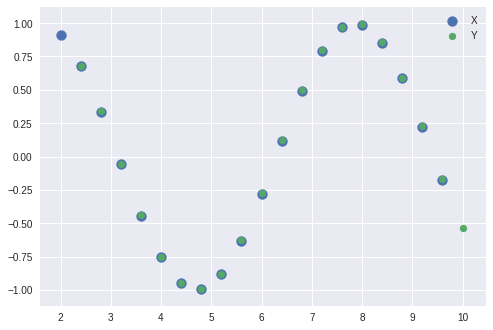

In [8]:
pl.scatter(data_time_steps[:-1], x, s=100, label='X')
pl.scatter(data_time_steps[1:], y+0.005, label="Y")
pl.legend()
pl.show()

In [9]:
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal_(w1, 0.0, 0.4)
w1 = Variable(w1, requires_grad=True)

w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal_(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)

print("w1 = ",w1)
print("w2 = ", w2)

('w1 = ', tensor([[-0.6102, -0.3001, -0.2616, -0.6438, -0.0401, -0.2437],
        [-0.3919, -0.6436, -0.2849,  0.1215, -0.3109, -0.1006],
        [-0.0889,  0.6748,  0.0914,  0.1871, -0.2788, -0.4643],
        [ 0.2798,  0.0796,  0.3463,  0.0978, -0.2652,  0.3229],
        [ 0.4407, -0.0704,  0.8097, -0.0346,  0.0392, -0.4860],
        [ 0.2925,  0.4687, -0.3710,  0.2181,  0.0987,  0.4737],
        [-0.2913,  0.4653, -0.0036, -0.3370,  0.0550,  0.3755]],
       requires_grad=True))
('w2 = ', tensor([[-0.2854],
        [ 0.1217],
        [-0.4549],
        [ 0.2197],
        [ 0.6846],
        [-0.3624]], requires_grad=True))


In [0]:
def forward(input, context_state, w1, w2):
  xh = torch.cat((input, context_state), 1)
  context_state = torch.tanh(xh.mm(w1))
  out = context_state.mm(w2)
  return (out, context_state)

In [11]:
for i in range(epochs):
  total_loss = 0
  context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)
  for j in range(x.size(0)):
    input = x[j:(j+1)]
    target = y[j:(j+1)]
    (pred, context_state) = forward(input, context_state, w1, w2)
    loss = (pred-target).pow(2).sum()/2
    total_loss += loss
    loss.backward()
    w1.data -= lr * w1.grad.data
    w2.data -= lr * w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    context_state = Variable(context_state.data)
  if i %10 == 0:
    print("Epoch: {} loss {}".format(i, total_loss.data[0]))

Epoch: 0 loss 2.01560902596
Epoch: 10 loss 0.302462786436
Epoch: 20 loss 0.26835167408
Epoch: 30 loss 0.244405820966


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 40 loss 0.226059347391
Epoch: 50 loss 0.214263275266
Epoch: 60 loss 0.207835152745
Epoch: 70 loss 0.205058589578
Epoch: 80 loss 0.204210236669
Epoch: 90 loss 0.203712746501
Epoch: 100 loss 0.202297106385
Epoch: 110 loss 0.199189648032
Epoch: 120 loss 0.194155678153
Epoch: 130 loss 0.187336370349
Epoch: 140 loss 0.178971916437
Epoch: 150 loss 0.169212684035
Epoch: 160 loss 0.158102855086
Epoch: 170 loss 0.14571775496
Epoch: 180 loss 0.132335528731
Epoch: 190 loss 0.118550166488


In [12]:
print("w1 ", w1)
print("w2 ", w2)

('w1 ', tensor([[-1.2814, -0.4412, -0.0623, -0.5340,  0.0286, -0.6857],
        [-0.6668, -0.5734, -0.4448,  0.1142, -0.8675, -0.0674],
        [-0.1344,  0.7461,  0.3231,  0.1892, -0.6126, -0.3398],
        [-0.3983, -0.1492, -0.1011,  0.0783,  0.5858,  0.0955],
        [-0.3963, -0.3975,  0.4122, -0.0718,  0.9044, -0.7418],
        [ 0.2346,  0.2695, -0.4613,  0.1976,  0.6402,  0.2848],
        [-0.5404,  0.3998, -0.0754, -0.3371, -0.0195,  0.2964]],
       requires_grad=True))
('w2 ', tensor([[-0.7706],
        [-0.0554],
        [-0.1198],
        [ 0.1118],
        [ 1.3648],
        [-0.4085]], requires_grad=True))


In [0]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []

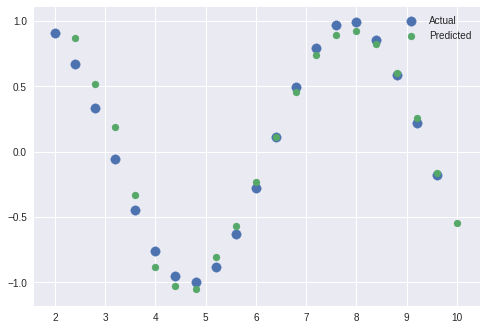

In [14]:
for i in range(x.size(0)):
  input = x[i:i+1]
  (pred, context_state) = forward(input, context_state, w1, w2)
  context_state = context_state
  predictions.append(pred.data.numpy().ravel()[0])


pl.scatter(data_time_steps[:-1], x.data.numpy(), s=90, label="Actual")
pl.scatter(data_time_steps[1:], predictions, label="Predicted")
pl.legend()
pl.show()